El siguiente NoteBook, se centrará en replicar un ejercicio de modelado utilizando tecnicas de Machene Learnig, en especifico XGboost, con el objetivo de seguir adentrandome en esta rama de la matematícas. 

Los datos a utilizar en el siguinte trabajo, provienen del repositorio de Machine Learning, y provienen de la valoración inmobiliaria, el cual es un problema de regresión de interés, para el estudio de estas tecnicas. Los datos históricos de mercado sobre valoración inmobiliaria se obtuvieron del Distrito Sindian de Nueva Taipéi, Taiwán.


Primeramente cargamos las librerias necesarias para el análisis, entre las cuales, las más importante viene siendo "sklearn"

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd 
import xgboost as xgb
from xgboost import XGBRegressor
import openpyxl
import os


Como se en que directorio de trabajo me encuentro?

In [15]:
print(os.getcwd())


c:\Semestres en la U\Proyectos - Portafolio\sklearn-env\Scripts


Los datos vienen con la extención XLSX, por lo que se utiliza la función "pd.read.excel" mediante la libreria openpyxl

In [39]:
data = pd.read_excel('Real estate valuation data set.xlsx')

Visualizamos las primeras 6 filas 

In [25]:
data.head() ## Primeras 6
data.tail() ## Ultimas 6 


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


Visualizar cuantas las dimensiones de los datos y las columnas de los datos

In [32]:
data.shape
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

Información de las variables de los datos

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


A continuación, para el análisis de interés, se es necesario seleccionar las variables adecuadas, y eliminar o omitir las que no se van a utilizar 

In [40]:
data.drop(['X1 transaction date', 'No'], axis=1, inplace=True) ## inplace = True, aplica los cambios directamiente 

Cambiar los nombres de las columnas 

In [44]:
data.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [47]:
data.columns = ['House Age', 'Distance to MRT', 'Number Stores', 'Latitude', 'Longitude', 'House Price Unit']
data.head()

,House Age,Distance to MRT,Number Stores,Latitude,Longitude,House Price Unit
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


Se me es de interes verificar la cantidad de valores faltantes que tengo en el dataset 

In [50]:
data.isna().sum()

House Age           0
Distance to MRT     0
Number Stores       0
Latitude            0
Longitude           0
House Price Unit    0
dtype: int64

Seguidamente, preparamos la variable respuesta y las variables predictoras, lo cual lo hacemos de la siguiente manera 


In [54]:
x = data.drop(['House Price Unit'], axis=1) ## Variables explicativas 
y = data['House Price Unit'] ## Variable respuesta

In [55]:
x.head()

,House Age,Distance to MRT,Number Stores,Latitude,Longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


Posteriormente, lo que hacemos será dividir el conjunto de datos en entrenamiento y prueba

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state= 1) ## 75, 25 

Dimenciones 

In [63]:
X_train.shape, X_test.shape

((310, 5), (104, 5))

Modelo 

In [64]:
model = XGBRegressor()

Ajustamos el modelo de a siguiente manera, y se presentan los parametros del modelo disponibles 

In [65]:
model.fit(X_train, Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Para visualizar las variables con mayor importancia cuando se creo el arbol de desición fue la edad de la casa.

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

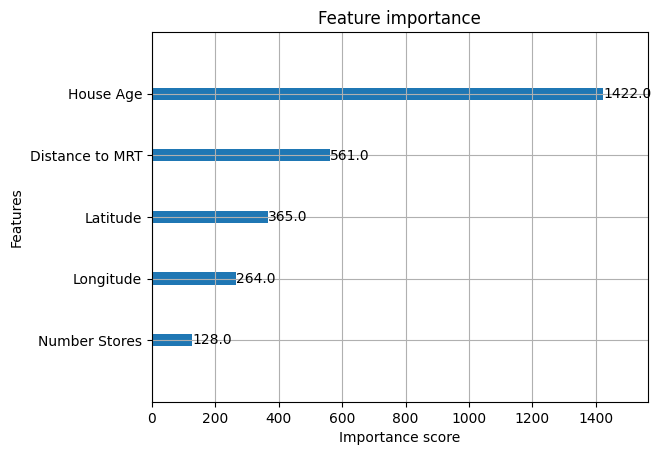

In [69]:
import matplotlib.pyplot as plt 
%matplotlib inline 

xgb.plot_importance(model, ax=plt.gca())

Realmente hay una relación entre el precio de la casa y el precio de la unidad del horgar 

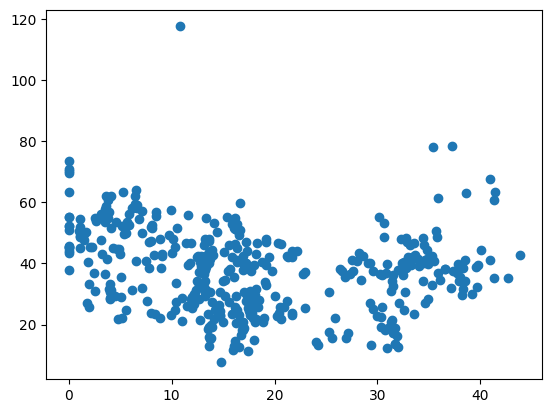

In [ ]:
plt.scatter(data['House Age'], data['House Price Unit']) ## Gráfico de dispersión 

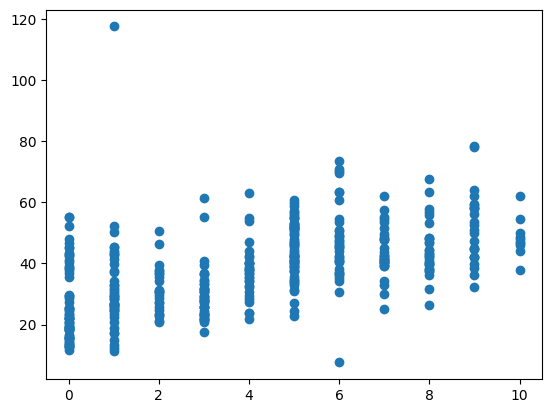

In [72]:
plt.scatter(data['Number Stores'], data['House Price Unit'])

Luego de visualizar y crear el modelo, lo siguiente será estudiar el poder de predicción del modelo 

In [74]:
predictions = model.predict(X_test)
predictions[1:10]

array([47.59294 , 25.965897, 13.541444, 82.97093 , 30.34448 , 27.4116  ,
       34.61086 , 42.58869 , 14.155872], dtype=float32)

In [76]:
X_test.iloc[1]

House Age            1.10000
Distance to MRT    193.58450
Number Stores        6.00000
Latitude            24.96571
Longitude          121.54089
Name: 102, dtype: float64

Verificar el ajuste de modelo, datos de entrenamiento 

In [78]:
from sklearn.metrics import mean_squared_error, r2_score 
pred_train = model.predict(X_train)
print(r2_score(Y_train, pred_train))

0.9915794044262433


In [80]:
print(mean_squared_error(Y_train, pred_train))  ## Como puedo ver si es bueno o malo 

1.5709674414661623


Verificar el ajuste del modelo en los datos de prueba

In [85]:
model.score(X_test, Y_test)

0.5416735262371419

In [86]:
print(r2_score(Y_test, predictions))

0.5416735262371419


In [84]:
print(mean_squared_error(Y_test, predictions))

80.92617493907454
